## Рубежный контроль №1 (Задача 3.1). Сысоев Александр РТ5-61Б

Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Дополнительно: для пары произвольных колонок данных построить график "Jointplot".

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

## Загрузка датасета и вывод общей информации

In [7]:
data = pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [8]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [9]:
data.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

## Масштабирование данных

Для масштабирования выберем признак "Composure"

In [11]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Composure']])
sc1_data

array([[1.        ],
       [0.98924731],
       [0.97849462],
       ...,
       [0.40860215],
       [0.46236559],
       [0.43010753]])

Сравним графики

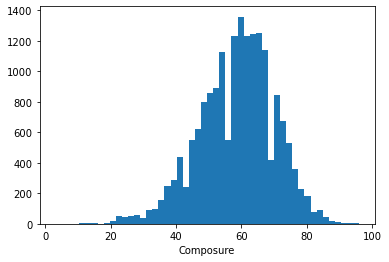

In [12]:
plt.hist(data['Composure'], 50)
plt.xlabel('Composure')
plt.show()

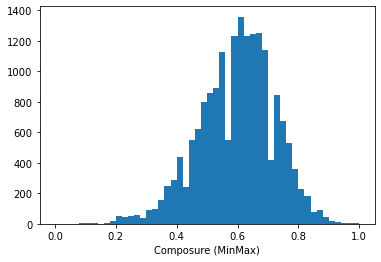

In [13]:
plt.hist(sc1_data, 50)
plt.xlabel('Composure (MinMax)')
plt.show()

Как видно, график не изменился, но значения теперь лежат в промежутке от 0 до 1

## Преобразование категориального признака в числовой

Сначала преобразуем признак "Nationality" при помощи Label Encoding

In [17]:
nation_data = data[['Nationality']]
nation_data

,Nationality
0,Argentina
1,Portugal
2,Brazil
3,Spain
4,Belgium
...,...
18202,England
18203,Sweden
18204,England
18205,England


In [18]:
nation_data['Nationality'].unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

In [19]:
le = LabelEncoder()
nation_data_le = le.fit_transform(nation_data['Nationality'])
le.classes_

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bolivia', 'Bosnia Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Rep.', 'Chad',
       'Chile', 'China PR', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'DR Congo', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Ethiopia', 'FYR Macedonia', 'Faroe Islands', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guam', 'Guatemala', 'Guinea',
       'Guinea Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 

In [20]:
nation_data_le

array([  6, 123,  20, ...,  46,  46,  46])

In [21]:
np.unique(nation_data_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163])

Теперь выполним преобразование посредством One Hot Encoding

In [23]:
ohe = OneHotEncoder()
nation_data_ohe = ohe.fit_transform(nation_data[['Nationality']])
nation_data.shape

(18207, 1)

In [24]:
nation_data_ohe.shape

(18207, 164)

Один столбец преобразовался в 164

In [37]:
pd.DataFrame(nation_data_ohe.toarray())

,0,1,2,3,4,5,6,7,8,9,...,154,155,156,157,158,159,160,161,162,163
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Построение графика JointPlot

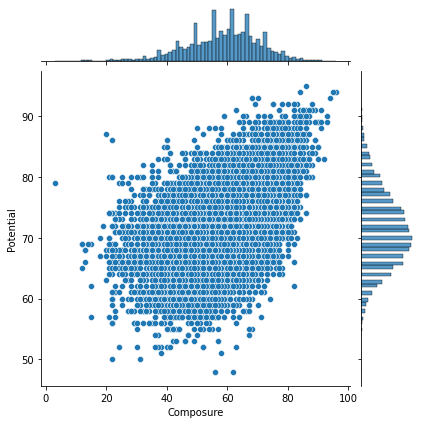

In [40]:
sns.jointplot(x = "Composure", y = "Potential", data = data)